In [1]:
# import necessrily libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load multi_variable data
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [3]:
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [4]:
# Split x , y from data x for features and y for target output
X = data[:,:3]
X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [5]:
y = data[:,-1]
y

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

In [6]:
# note linear regression model calculations need feature x0 = 1 for bais or theta0
# so we will add column in x features in postion column 0 and with one values
added_col = np.ones([X.shape[0],1])
print(added_col)
X = np.concatenate([added_col ,X] , axis = 1)
X


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [7]:
def plot(x ,y):
    plt.plot(x,y,'-ob','r')

# Task 1:
## Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.


### Please fulfil the following requirements:
<br>
<b>
    
    1. Check your implementation on the data in the attached file.
    2. You must obtain r2-score > 0.9.
    3. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    4. Choose hyper parameters to obtain the required accuracy.
    5. The implementation must be vectoried and calculations must be performed as matrix vector 
    multiplications.
    6. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>

In [8]:
# define adam optimizer function which use for minmize theta  using batch griadiant descent

In [9]:
def adam_batch(x,y,a,e,b1,b2,mx):
    mt = 0
    vt = 0
    beta1 = b1
    beta2 = b2
    m = x.shape[0]
    epoch = mx 
    alpha = a
    epsilon = e
    theta = np.zeros(x.shape[1])
    #batch 
    y_hat = np.zeros(m)
    cost_list = []
    th0 =[]
    th1 =[]
    th2 =[]
    th3 =[]
    for i in range(epoch):
        th0.append(theta[0])
        th1.append(theta[1])
        th2.append(theta[2])
        th3.append(theta[3])
        
        #calculate y predict = x(m*n) @ theta(n*1) = (m * 1) like y 
        y_hat = x @ theta
        # calculate error vector = y predict - y
        error = y_hat - y
        # then we will calculate cost function (note :(error**2) == (error @ error) but dot product is faster
        cost = (error @ error) / (2 * m)
        print("cost = ",cost)
        # append cost to cost_list
        cost_list.append(cost)
        # calculate gradiant of theta vector 
        grad_vec = (x.T @ error ) / m
        print("gradiant vector \n",grad_vec)
        # calculate gradiant norm 
        grad_norm = np.linalg.norm(grad_vec)
        print("Gradiant Norm = \n",grad_norm)
        # update using adam 
            
        #update  momentum , v ,theta actual
        mt = (mt * beta1) + (1 - beta1)*(grad_vec)
        #bais correction for mt
        mth = mt / (1 - beta1)
            

        vt = (beta2 * vt) + (1 - beta2)*(grad_vec @ grad_vec)
        #bais correction for vt
        vth = vt / (1 - beta2)
        #update theta 
        theta = theta  - ((alpha /((np.sqrt(vth)+epsilon)) * mth))
        print("v0  = ",vth)
        print("theta0 _ new = ",theta)
        if i > 0 :
            diff = np.abs(cost_list[-1] - cost_list[-2])
            # convergence check (cost check)  and stop criteria (Gradient Check)
            if diff < 0.01 or grad_norm < 0.001:
                
                print("converged after ",i," iterations")
                print("theta0 _ new = ",theta)
            
                break
    return i,theta,error,cost,y_hat,cost_list ,th0,th1,th2,th3
    

        
            
        

In [10]:
alpha = 0.05
beta1 = 0.05
beta2 = 0.7
epsilon = 1e-08
iterations = 500
i,theta,error,cost,y_hat,cost_list,th0,th1,th2,th3 = adam_batch(X,y,alpha,epsilon,beta1,beta2,iterations)
print("****************** Training Report ********************")
print("Gradient Descent converged after ",i," epochs")
print("theta_0_Opt : ",theta)

print("Error Vector :\n",error)
print("cost = ",cost)
print("h(x) = y_predict:\n",y_hat)
print("y_actual:\n",y)

cost =  13405.98
gradiant vector 
 [  -162.04 -13075.8  -13147.2  -13467.08]
Gradiant Norm = 
 22917.5459892197
v0  =  525213914.1679999
theta0 _ new =  [0.00035353 0.02852792 0.0286837  0.02938159]
cost =  12284.59942352767
gradiant vector 
 [  -155.1110068  -12516.55372935 -12584.87628274 -12891.64022454]
Gradiant Norm = 
 21937.677074271898
v0  =  848911415.3326347
theta0 _ new =  [0.00063362 0.05112935 0.0514085  0.05266028]
cost =  11430.95095644878
gradiant vector 
 [  -149.62139501 -12073.48144563 -12139.36584499 -12435.73834694]
Gradiant Norm = 
 21161.359411242625
v0  =  1042041122.864631
theta0 _ new =  [0.00087801 0.07085014 0.0712369  0.07297273]
cost =  10711.21812214288
gradiant vector 
 [  -144.83140004 -11686.87597329 -11750.63295011 -12037.93831956]
Gradiant Norm = 
 20483.978614104322
v0  =  1149022165.8683248
theta0 _ new =  [0.00110328 0.08902784 0.08951378 0.09169644]
cost =  10068.531902301222
gradiant vector 
 [  -140.41615537 -11330.51699444 -11392.31299325 -116

In [11]:
from sklearn.metrics import r2_score
r2_score(y,y_hat)

0.9789548751810617

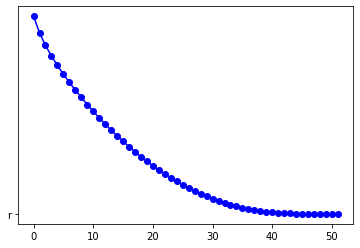

In [12]:
plot(range(len(cost_list)),cost_list)

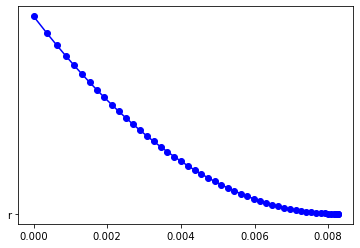

In [13]:
plot(th0,cost_list)

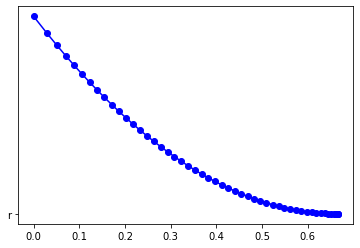

In [14]:
plot(th1,cost_list)

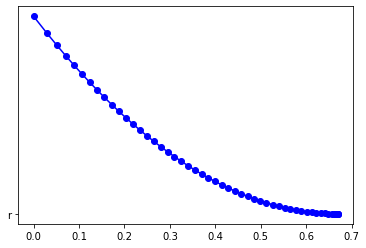

In [15]:
plot(th2,cost_list)

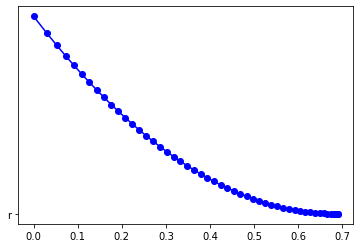

In [16]:
plot(th3,cost_list)

In [17]:
alpha = 0.09
beta1 = 0.05
beta2 = 0.7
epsilon = 1e-08
iterations = 500
i,theta,error,cost,y_hat,cost_list,th0,th1,th2,th3 = adam_batch(X,y,alpha,epsilon,beta1,beta2,iterations)
print("****************** Training Report ********************")
print("Gradient Descent converged after ",i," epochs")
print("theta_0_Opt : ",theta)

print("Error Vector :\n",error)
print("cost = ",cost)
print("h(x) = y_predict:\n",y_hat)
print("y_actual:\n",y)

cost =  13405.98
gradiant vector 
 [  -162.04 -13075.8  -13147.2  -13467.08]
Gradiant Norm = 
 22917.5459892197
v0  =  525213914.1679999
theta0 _ new =  [0.00063635 0.05135026 0.05163066 0.05288687]
cost =  11422.770243452755
gradiant vector 
 [  -149.56781224 -12069.15671283 -12135.01730893 -12431.28840418]
Gradiant Norm = 
 21153.781949457025
v0  =  815132230.6827738
theta0 _ new =  [0.00113337 0.09145689 0.09195616 0.09419672]
cost =  9984.17699495105
gradiant vector 
 [  -139.82628969 -11282.90830143 -11344.44230916 -11622.27337083]
Gradiant Norm = 
 19776.177101299912
v0  =  961689742.2199208
theta0 _ new =  [0.00156206 0.12604819 0.12673611 0.12982831]
cost =  8821.167310605153
gradiant vector 
 [  -131.4241922  -10604.76631042 -10662.56863403 -10924.49504353]
Gradiant Norm = 
 18587.988128049823
v0  =  1018696122.2024658
theta0 _ new =  [0.00195347 0.15763212 0.15849219 0.16236434]
cost =  7822.164992971783
gradiant vector 
 [  -123.75239778  -9985.56786469 -10039.96287113 -1028

In [18]:
alpha = 0.007
beta1 = 0.05
beta2 = 0.7
epsilon = 1e-08
iterations = 500
i,theta,error,cost,y_hat,cost_list,th0,th1,th2,th3 = adam_batch(X,y,alpha,epsilon,beta1,beta2,iterations)
print("****************** Training Report ********************")
print("Gradient Descent converged after ",i," epochs")
print("theta_0_Opt : ",theta)

print("Error Vector :\n",error)
print("cost = ",cost)
print("h(x) = y_predict:\n",y_hat)
print("y_actual:\n",y)

cost =  13405.98
gradiant vector 
 [  -162.04 -13075.8  -13147.2  -13467.08]
Gradiant Norm = 
 22917.5459892197
v0  =  525213914.1679999
theta0 _ new =  [4.94939554e-05 3.99390930e-03 4.01571792e-03 4.11342297e-03]
cost =  13246.037313846104
gradiant vector 
 [  -161.06994095 -12997.50552211 -13068.47467958 -13386.51843144]
Gradiant Norm = 
 22780.36434057239
v0  =  886594739.406822
theta0 _ new =  [8.92647069e-05 7.20320203e-03 7.24253412e-03 7.41876834e-03]
cost =  13118.211494027353
gradiant vector 
 [  -160.29045179 -12934.59213883 -13005.21509368 -13321.78333131]
Gradiant Norm = 
 22670.132279852613
v0  =  1134551215.170791
theta0 _ new =  [0.00012433 0.01003311 0.01008789 0.01033339]
cost =  13006.010755176267
gradiant vector 
 [  -159.60310827 -12879.11592671 -12949.43360461 -13264.70075245]
Gradiant Norm = 
 22572.93106661299
v0  =  1303723067.5576155
theta0 _ new =  [0.00015691 0.01266195 0.01273109 0.01304093]
cost =  12902.21381512144
gradiant vector 
 [  -158.96460046 -1282

# Task 2
## Repeat task 1 using BFGS optimizer instead of Adam.
### All the requirments stated in task 1 must be also fulfilled in task 2.
### Compare the results from task 1 and task 2 and write your conclusion. 

In [19]:
def bfgs_multi_cost (x , y , e ,mx, a = 1):
    y = y.reshape(-1,1)
    epoch = mx 
    alpha = a
    epsilon = e 
    identity = np.eye(x.shape[1])
    # initailize B_inverse matrix with identity matrix
    B_inv = identity
    # initialize theta vector  note we need delta theta
    theta0 = np.zeros((x.shape[1],1))
    
    theta = np.ones((x.shape[1],1))
    print("y ",y.shape)
    print("theta",theta.shape)
    theta = theta * 0.1
    # m is :
    m = x.shape[0]
    # intialilize y predict vector
    y_hat0 = np.zeros((m,1))
    y_hat = np.zeros((m ,1))
    cost_list = []
    th0 =[]
    th1 =[]
    th2 =[]
    th3 =[]
    for i in range(epoch):
        th0.append(theta[0])
        th1.append(theta[1])
        th2.append(theta[2])
        th3.append(theta[3])
        
        # we will duplicate all of the calculation for theta old and thta new
        #calculate y predict = x(m*n) @ theta(n*1) = (m * 1) like y 
        y_hat0 = x @ theta0 
        y_hat = x @ theta
        print("yhat ",y_hat.shape)
        # calculate error vector = y predict - y
        error0 = y_hat0 - y
        error = y_hat - y
        print("error \n",error.shape)
        # then we will calculate cost function (note :(error**2) == (error @ error) but dot product is faster
        cost0 = (error0.T @ error0) / (2 * m)
        cost = (error.T @ error) / (2 * m)
        print("cost = ",cost)
        # append cost to cost_list
       
        cost_list.append(cost[0,0])
        # calculate gradiant of theta vector 
        grad_vec0 = (x.T @ error0 ) / m
        grad_vec = (x.T @ error ) / m
        print("gradiant vector \n",grad_vec.shape)
        # calculate gradiant norm 
        grad_norm = np.linalg.norm(grad_vec)
        print("gradiant norm \n",grad_norm)
        #  calculate delta of theta
        delta_theta = theta - theta0
        # calculate delta of gradiant vector
        delta_grad = grad_vec - grad_vec0
        # calculate B inverse
        B_inv = (identity - ((delta_theta@ delta_grad.T) / (delta_grad.T @ delta_theta))) @ B_inv @ (identity -((delta_grad @ delta_theta.T) / (delta_grad.T @ delta_theta)))  +((delta_theta @ delta_theta.T)/(delta_grad.T @ delta_theta))
        print("B_inv ",B_inv)
        theta0 = theta 
        theta = theta - alpha * (  B_inv   @  grad_vec)
        
        if i > 0 :
            
            diff = np.abs(cost_list[-1] - cost_list[-2])
            # convergence check (cost check)  and stop criteria (Gradient Check)
            if diff < epsilon or grad_norm <epsilon :
                
                print("Found solution after ",i , " iterations.\n")
                print("theta _min = ",theta)
                print("Gradient =  ",grad_vec)
                break 

     
    return i,theta ,y_hat , cost, cost_list ,th0,th1,th2,th3
    

In [28]:
epsilon = 0.001
mx = 300
alpha = 0.1
i ,theta ,y_hat  , cost, cost_list ,th0,th1,th2,th3 = bfgs_multi_cost (X, y , epsilon  ,mx, alpha)
print("****************** Training Report ********************")
print("Gradient Descent converged after ",i," epochs")
print("theta_0_Opt : ",theta)
print("cost_list \n", cost_list)
print("Error Vector :\n",error.shape)
print("cost = ",cost)
print("h(x) = y_predict:\n",y_hat)
print("y_actual:\n",y)

y  (25, 1)
theta (4, 1)
yhat  (25, 1)
error 
 (25, 1)
cost =  [[9717.0738]]
gradiant vector 
 (4, 1)
gradiant norm 
 19509.66854085594
B_inv  [[ 1.32257848 -0.00156435 -0.00337127 -0.01106197]
 [-0.00156435  0.67429282 -0.32751409 -0.3352048 ]
 [-0.00337127 -0.32751409  0.67067899 -0.33701171]
 [-0.01106197 -0.3352048  -0.33701171  0.65529758]]
yhat  (25, 1)
error 
 (25, 1)
cost =  [[7872.24461135]]
gradiant vector 
 (4, 1)
gradiant norm 
 17558.53753992137
B_inv  [[ 1.32258383e+00 -5.79025802e-04 -9.55254515e-04 -1.43319383e-02]
 [-5.79025802e-04  6.58740639e-01 -3.55484373e-01 -2.89364517e-01]
 [-9.55254515e-04 -3.55484373e-01  6.26493079e-01 -2.58043631e-01]
 [-1.43319383e-02 -2.89364517e-01 -2.58043631e-01  5.22156143e-01]]
yhat  (25, 1)
error 
 (25, 1)
cost =  [[6461.50778079]]
gradiant vector 
 (4, 1)
gradiant norm 
 12214.592667606055
B_inv  [[ 1.32257094e+00 -8.87574780e-04 -3.20160411e-03 -1.18924793e-02]
 [-8.87574780e-04  6.54354222e-01 -4.23160335e-01 -2.20163721e-01]
 [-3.

In [29]:
from sklearn.metrics import r2_score
r2_score(y,y_hat)

0.9896255573811703

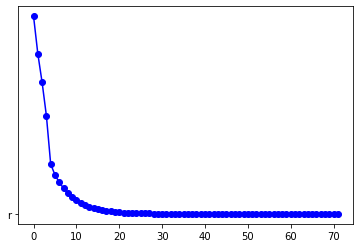

In [30]:
plot(range(len(cost_list)),cost_list)

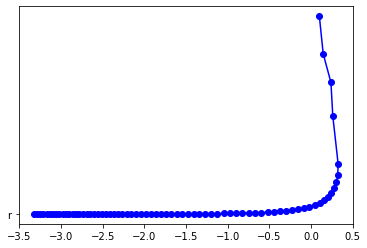

In [31]:
plot(th0,cost_list)

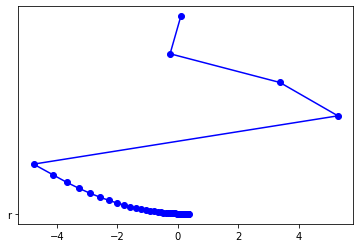

In [32]:
plot(th1,cost_list)

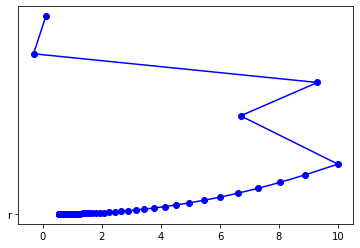

In [33]:
plot(th2,cost_list)

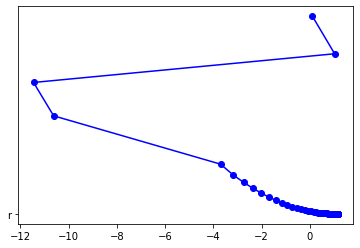

In [34]:
plot(th3,cost_list)

<h1> Concolusion bfgs(second order optimizer) is more faster than Adam to minimize cost in less epochs but some times it will be fail to converge   </h1>